## Imbalance Dataset for Logistic Regression

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from collections import Counter
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_clusters_per_class=2,
    n_informative=2,
    weights=[0.99],
    n_redundant=0,
    random_state=42
)

In [4]:
X

array([[ 0.77144029, -1.26233499],
       [-1.2921157 , -0.40911066],
       [-0.16250955, -1.78972973],
       ...,
       [-3.76432495,  0.30167126],
       [-1.19534182, -0.80086964],
       [-0.53049771, -1.33108209]])

In [5]:
Counter(y)

Counter({0: 9862, 1: 138})

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

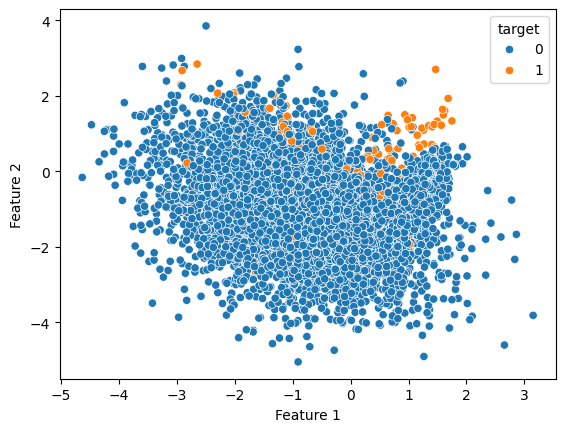

In [6]:
import seaborn as sns
import pandas as pd

# Assuming X is your features and y is your target
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])  # Use appropriate feature names
df['target'] = y  # Add the target to the DataFrame

sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='target')


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

### Hyperparameter Tuning

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [9]:
params = dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

### GridSearchCv

In [10]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [11]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='accuracy', n_jobs=-1)

In [12]:
grid.fit(X_train,y_train)

/home/pi/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pi/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pi/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pi/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pi/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pi/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: T

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [13]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 50, 1: 50}, 'penalty': 'l1', 'solver': 'saga'}

In [14]:
grid.best_score_

0.9871428571428572

In [15]:
y_pred = grid.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [17]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.98
[[2930   25]
 [  35   10]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2955
           1       0.29      0.22      0.25        45

    accuracy                           0.98      3000
   macro avg       0.64      0.61      0.62      3000
weighted avg       0.98      0.98      0.98      3000

